In [1]:
DATA_FILE = '/Users/vahid/data/recommender/'
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv(DATA_FILE+'train_interactions.csv')

In [6]:
train_sample_df = train_df.sample(n=1000000, random_state=0)

In [7]:
train_sample_df[train_sample_df.interaction == 0].shape[0], train_sample_df[train_sample_df.interaction == 1].shape[0]

(938479, 61521)

In [8]:
train_sample_df.to_csv('./data/sample_train_1M.csv')

In [99]:
users = train_df.user_id.unique()
len(users)

2589286

In [7]:
icons_df = pd.read_csv(DATA_FILE+'icons.csv')

In [35]:
icons_df.head()

,notif_id,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F191,F192,F193,F194,F195,F196,F197,F198,F199,F200
0,447519,-4.966424,11.489478,4.418155,-8.264528,0.483450,-8.726120,-9.982015,-2.117726,-1.253858,...,-0.165652,0.236250,-0.536746,0.074008,-0.198941,-0.087212,0.135536,-0.169727,0.010327,-0.124046
1,441851,1.695928,-9.561707,-1.148592,-7.545650,-8.476706,5.449286,3.271107,3.806645,1.922784,...,-0.284256,-0.293422,-0.112613,-0.665172,-0.145205,-0.445586,-0.055238,0.116369,-0.637553,-0.056821
2,483576,-3.164493,4.960090,-3.474825,-2.931745,1.532727,-2.396772,10.594930,1.161292,0.133073,...,0.108387,-0.069454,0.136111,0.115855,0.003308,0.032245,0.045250,-0.091309,-0.008784,0.300490
3,564340,17.057026,-1.445091,-15.867423,2.147889,-7.040503,1.373868,-4.365830,0.633132,-3.303665,...,-0.168556,0.110151,-0.164698,0.242161,0.055488,0.050694,0.190996,-0.144006,0.439409,0.108422
4,549636,-10.604857,4.211807,-3.017962,-3.874277,-4.608191,-5.410021,-5.191367,1.042329,-4.308573,...,0.413350,-0.187556,-0.132629,0.991428,1.060254,-0.262702,-0.447537,0.092006,0.370397,0.114488


In [45]:
icons_df = icons_df.drop(columns=['notif_id'])
icons_df = icons_df.drop_duplicates()

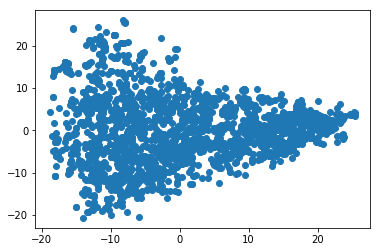

In [51]:
pca = PCA(n_components=2)
pca.fit(icons_df.values[:,:])
y = pca.transform(icons_df.values[:,:])
plt.scatter(y[:,0], y[:,1])

In [59]:
distances = np.zeros([icons_df.shape[0],icons_df.shape[0]])
for i in range(icons_df.shape[0]):
    if i % 100 == 0:
        print(i)
    for j in range(icons_df.shape[0]):
        distances[i,j] = np.linalg.norm(icons_df.iloc[i].values - icons_df.iloc[j].values)


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700


KeyboardInterrupt: 

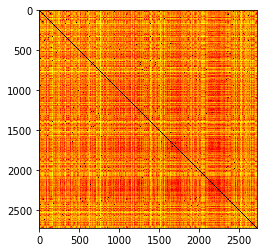

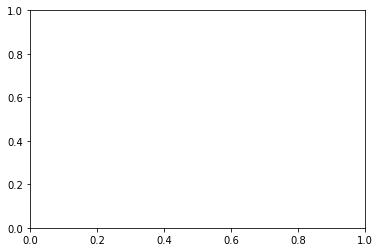

In [93]:
dd = (distances - distances.min()) / (distances.max() - distances.min())
plt.imshow(dd, cmap='hot', interpolation='nearest')
fig, axis = plt.subplots() # il me semble que c'est une bonne habitude de faire supbplots
heatmap = axis.pcolor(dd, cmap=plt.cm.Blues) # heatmap contient les valeurs
plt.colorbar(heatmap)
plt.show()

NameError: name 'data' is not defined

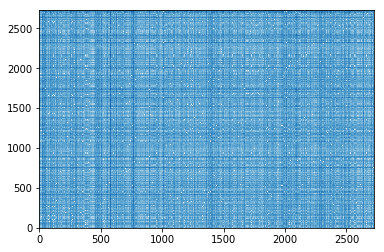

In [94]:
fig, axis = plt.subplots() # il me semble que c'est une bonne habitude de faire supbplots
heatmap = axis.pcolor(dd, cmap=plt.cm.Blues) # heatmap contient les valeurs

axis.set_yticks(np.arange(data.shape[0])+0.5, minor=False)
axis.set_xticks(np.arange(data.shape[1])+0.5, minor=False)

axis.invert_yaxis()

axis.set_yticklabels(row_labels, minor=False)
axis.set_xticklabels(column_labels, minor=False)

# fig.set_size_inches(5, 5)

(2, 2)
[[0.75 0.25]
 [0.25 0.25]]


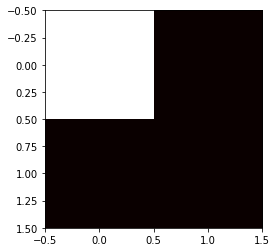

In [83]:
dd.max()
a = [[0.75,0.25],[0.25,0.25]]
a = np.array(a, dtype=np.float32)
print(a.shape)
print(a)
plt.imshow(a, cmap='hot', interpolation='nearest')
plt.show()